# Boxplot & Outlier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = pd.read_csv('../data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


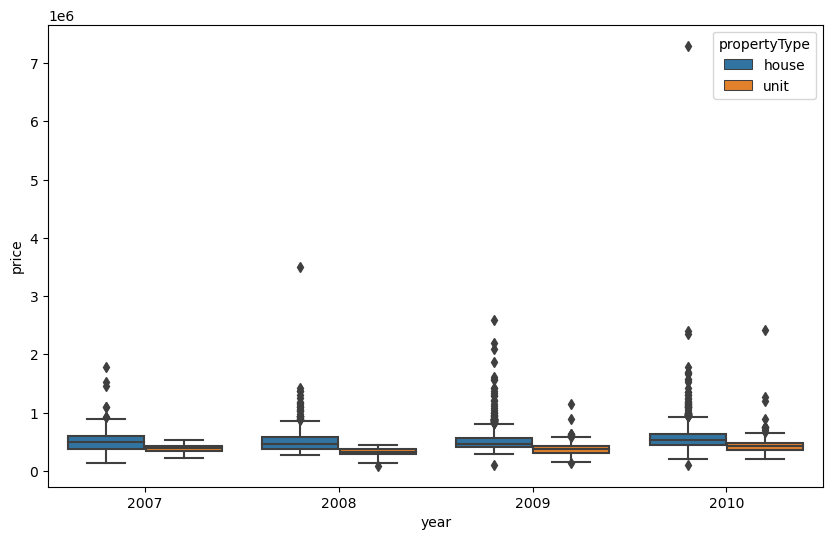

In [2]:
df = sales.loc[sales['year'].isin([2007, 2008, 2009, 2010]), :]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='year', y='price', hue='propertyType', data=df, ax=ax, )
plt.show()

In [3]:
# 이상치 확인

Q1 = sales['price'].quantile(0.25)
Q3 = sales['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + IQR * 1.5
lower_bound = Q1 - IQR * 1.5

df_clean = df.loc[(sales['price'] >= lower_bound) & (sales['price'] <= upper_bound)].reset_index(drop=True)
df_clean.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


In [4]:
def remove_outlier(df, colr):
    Q1 = df[colr].quantile(0.25)
    Q3 = df[colr].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR * 1.5
    lower_bound = Q1 - IQR * 1.5
    df_clean = df.loc[(df[colr] >= lower_bound) & (df[colr] <= upper_bound)].reset_index(drop=True)
    return df_clean

In [5]:
df_clean = remove_outlier(sales, 'price')
df_without = df_clean.loc[df_clean['year'].isin([2007, 2008, 2009, 2010]), :]
df_with = sales.loc[sales['year'].isin([2007, 2008, 2009, 2010]), :]

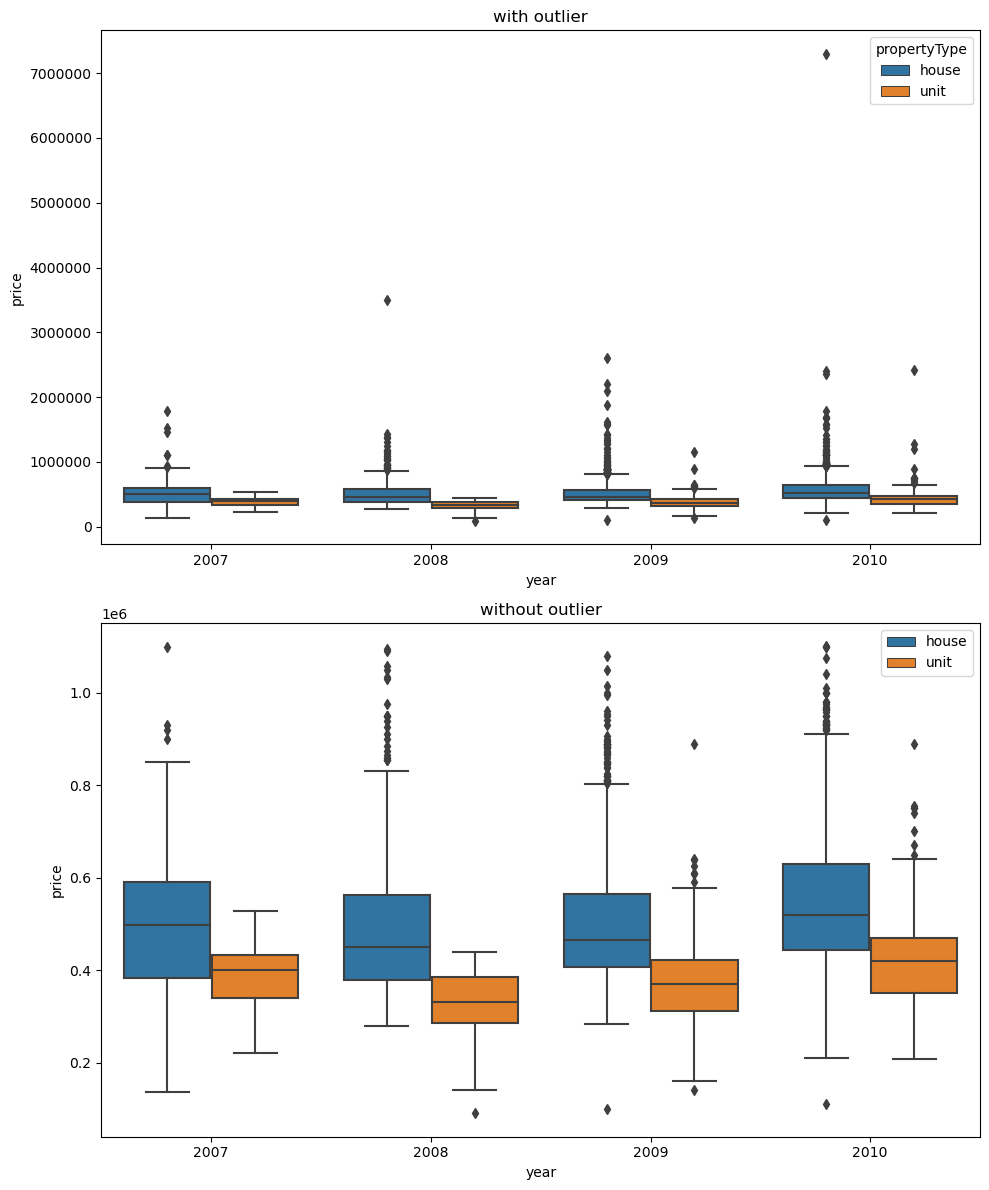

In [6]:
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter()
formatter.set_scientific(False)

fig, ax = plt.subplots(nrows=2, figsize=(10, 12))
sns.boxplot(x='year', y='price', hue='propertyType', data=df_with, ax=ax[0], )
ax[0].set_title('with outlier')
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(x='year', y='price', hue='propertyType', data=df_without, ax=ax[1], )
ax[1].set_title('without outlier')

plt.subplots_adjust(hspace=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# subplots

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


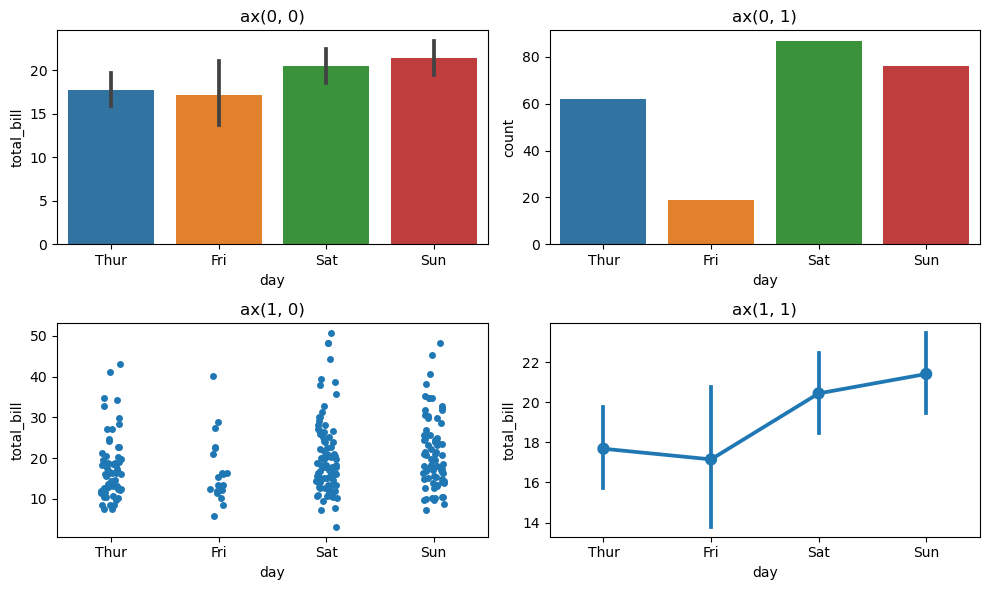

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
sns.barplot(x='day', y='total_bill', data=tips, ax=ax[0, 0])
sns.countplot(x='day', data=tips, ax=ax[0, 1])
sns.stripplot(x='day', y='total_bill', data=tips, ax=ax[1, 0])
sns.pointplot(x='day', y='total_bill', data=tips, ax=ax[1, 1])
ax[0, 0].set_title('ax(0, 0)')
ax[0, 1].set_title('ax(0, 1)')
ax[1, 0].set_title('ax(1, 0)')
ax[1, 1].set_title('ax(1, 1)')
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

# Advanced

In [10]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FuncFormatter
import numpy as np


In [53]:
def major_formatter(x, pos):
    return '%.2f$' % x

formatter = FuncFormatter(major_formatter)

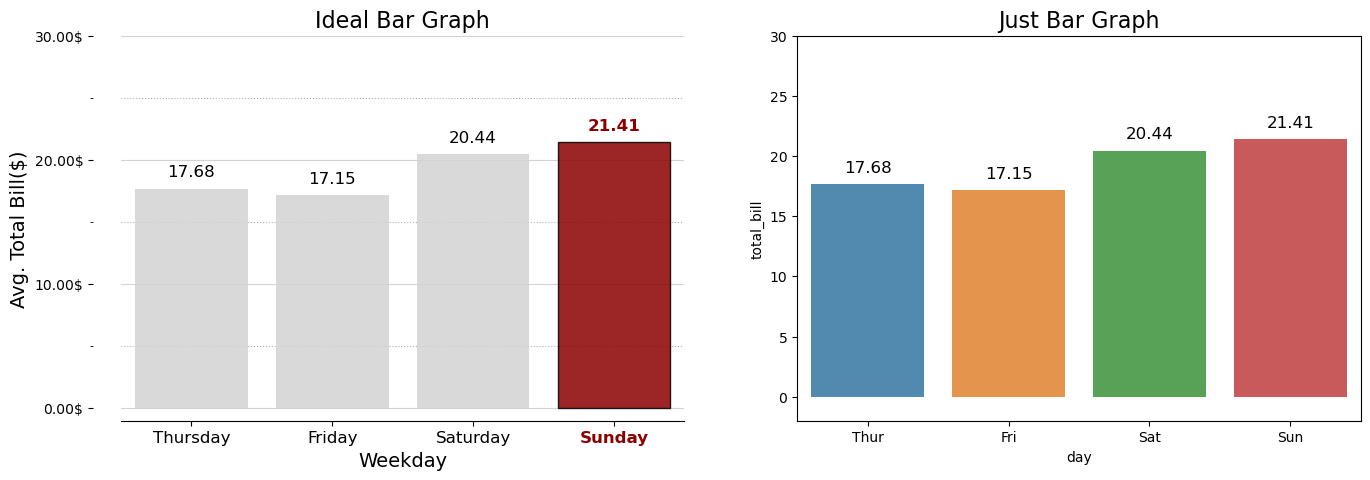

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax0 = sns.barplot(x='day', y='total_bill', data=tips, ax=ax[0], errorbar=None, color='lightgray', alpha=0.85, zorder=2)

# ax[0].bar_label(ax0.containers[0], fmt='%.2f$')

group_mean = tips.groupby('day')['total_bill'].mean()
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)

for p in ax0.patches:
    fontweight = 'normal'
    color = 'k'
    height = np.round(p.get_height(), 2)
    if h_mean == height:
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    ax0.text(x=p.get_x() + p.get_width() / 2, y=height + 1, s=str(height), ha='center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-1, 30)
ax0.set_title('Ideal Bar Graph', size=16)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['left'].set_position(('outward', 20))
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel('Avg. Total Bill($)', fontsize=14)

ax0.grid(axis='y', which='major', color='lightgray')
ax0.grid(axis='y', which='minor', ls=':')

ax0.set_xlabel('Weekday', fontsize=14)
for xtick in ax0.get_xticklabels():
    if xtick.get_text() == h_day:
        xtick.set_color('darkred')
        xtick.set_fontweight('demibold')
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

# 비교를 위한 간단한 차트
ax1 = sns.barplot(data=tips, x='day', y='total_bill', errorbar=None, alpha=0.85, ax=ax[1])
for p in ax1.patches:
    height = np.round(p.get_height(), 2)    
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height + 1, s=str(height), ha='center', size=12)
ax1.set_ylim(-2, 30)
ax1.set_title('Just Bar Graph', size=16)
plt.show()